In [1]:
from nltk.corpus import gutenberg

In [2]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
file_name =  'austen-emma.txt'
num_chars = len(gutenberg.raw(file_name))
num_words = len(gutenberg.words(file_name))
num_sents = len(gutenberg.sents(file_name))
num_vocab = len(set([w.lower() for w in gutenberg.words(file_name)]))

平均词长，平均句子长度，每个词出现的平均次数

In [4]:
print int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab)

4 24 26


最长句子

In [6]:
macb_sentence = gutenberg.sents('shakespeare-macbeth.txt')

In [13]:
longest = max([len(s) for s in macb_sentence])
for s in macb_sentence:
    if len(s)==longest:
        print ' '.join(s)

Doubtfull it stood , As two spent Swimmers , that doe cling together , And choake their Art : The mercilesse Macdonwald ( Worthie to be a Rebell , for to that The multiplying Villanies of Nature Doe swarme vpon him ) from the Westerne Isles Of Kernes and Gallowgrosses is supply ' d , And Fortune on his damned Quarry smiling , Shew ' d like a Rebells Whore : but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) Disdayning Fortune , with his brandisht Steele , Which smoak ' d with bloody execution ( Like Valours Minion ) caru ' d out his passage , Till hee fac ' d the Slaue : Which neu ' r shooke hands , nor bad farwell to him , Till he vnseam ' d him from the Naue toth ' Chops , And fix ' d his Head vpon our Battlements


### 2.2 条件频率分布

In [2]:
import nltk
from nltk.corpus import brown

#### 按文体计数词汇

In [4]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [6]:
print cfd.conditions()

[u'mystery', u'belles_lettres', u'humor', u'government', u'fiction', u'reviews', u'religion', u'romance', u'science_fiction', u'adventure', u'editorial', u'hobbies', u'lore', u'news', u'learned']


In [7]:
cfd['mystery']

FreqDist({u'cinch': 2,
          u'Soak': 1,
          u'wrought-iron': 1,
          u'knelt': 1,
          u'Heights': 1,
          u'four': 13,
          u'woods': 2,
          u'hanging': 4,
          u'scheming': 1,
          u'captain': 10,
          u'Until': 1,
          u'marching': 1,
          u'whose': 1,
          u'pardon': 1,
          u'snowing': 1,
          u'chatter': 2,
          u'contained': 1,
          u'salesgirl': 1,
          u'Casey': 16,
          u'Western': 1,
          u'trousers': 2,
          u'lore': 2,
          u'Cases': 1,
          u'flicking': 1,
          u"shouldn't": 1,
          u'sinking': 2,
          u'swivel': 3,
          u'tantalizing': 1,
          u"hangin'": 1,
          u'affect': 1,
          u'Ducking': 1,
          u'sleek': 1,
          u'screaming': 2,
          u'vast': 1,
          u'Presumably': 1,
          u'snowflakes': 1,
          u"Medfield's": 1,
          u'yachting': 1,
          u'wooden': 3,
          u'clientele':

#### 绘制分布图和分布表

In [4]:
### 文件名 eg. 1865-Lincoln.txt
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

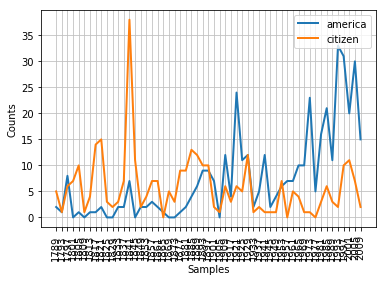

In [5]:
cfd.plot()

In [7]:
from nltk.corpus import udhr

In [8]:
language = ['English', 'Chickasaw','German_Deutsch', 'Greenlandic_Inuktikut']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in language
    for word in udhr.words(lang+ '-Latin1'))

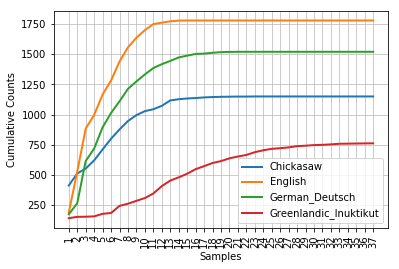

In [9]:
cfd.plot(cumulative=True)

In [10]:
cfd.tabulate(conditions = ['English', 'German_Deutsch'], samples=range(10))

                 0   1   2   3   4   5   6   7   8   9 
       English   0 185 340 358 114 169 117 157 118  80 
German_Deutsch   0 171  92 351 103 177 119  97 103  62 


#### 双连词生成随机文本

In [12]:
##bigrams()
sent = ["In", "the", "beginning"]
nltk.bigrams(sent)

<generator object bigrams at 0x7ff1e68d36e0>


In [23]:
## 由条件概率分布，获得最可能跟在给定词后面单词
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print word,
        word = cfdist[word].max()

In [14]:
from nltk.corpus import genesis
text = genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [19]:
cfd['living']

FreqDist({u',': 1,
          u'.': 1,
          u'creature': 7,
          u'soul': 1,
          u'substance': 2,
          u'thing': 4})

In [24]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land


### 2.4 词典资源
#### 过滤文本  
查找不常见及拼写错误单词

In [25]:
from nltk.corpus import words
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [26]:
unusual_words(gutenberg.words('austen-sense.txt'))

[u'abbeyland',
 u'abhorred',
 u'abilities',
 u'abounded',
 u'abridgement',
 u'abused',
 u'abuses',
 u'accents',
 u'accepting',
 u'accommodations',
 u'accompanied',
 u'accounted',
 u'accounts',
 u'accustomary',
 u'aches',
 u'acknowledging',
 u'acknowledgment',
 u'acknowledgments',
 u'acquaintances',
 u'acquiesced',
 u'acquitted',
 u'acquitting',
 u'acted',
 u'actions',
 u'adapted',
 u'adding',
 u'additions',
 u'addressed',
 u'addresses',
 u'addressing',
 u'adhering',
 u'adieus',
 u'adjusting',
 u'administering',
 u'admirers',
 u'admires',
 u'admitting',
 u'adorned',
 u'advances',
 u'advantages',
 u'affairs',
 u'affections',
 u'affects',
 u'affixed',
 u'afflictions',
 u'afforded',
 u'affording',
 u'ages',
 u'agitated',
 u'agonies',
 u'ailments',
 u'aimed',
 u'alarms',
 u'alienated',
 u'alighted',
 u'alleged',
 u'allenham',
 u'allowances',
 u'allowed',
 u'allowing',
 u'alluded',
 u'alterations',
 u'altered',
 u'altering',
 u'amended',
 u'amounted',
 u'amusements',
 u'ankles',
 u'annamaria

In [14]:
## 高频词 通常没有实际词汇内容
from nltk.corpus import stopwords
stopwords.words('english')

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

#### 除去stopwords后词所占比例

In [33]:
def content_fraction(text):
    stops = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stops]
    return len(content)*1./len(text)

In [34]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

### WordNet 
面向语义的英语词典

In [1]:
from nltk.corpus import wordnet as wn

In [6]:
wn.synsets('motorcar')

[Synset('car.n.01')]

car.n.01被称为synset 或同义词集

In [8]:
wn.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

In [10]:
wn.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [11]:
wn.synset('car.n.01').examples()

[u'he needs a car to get to work']

In [12]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [4]:
types_of_motor = wn.synset('car.n.01').hyponyms()

In [19]:
types_of_motor[1].lemmas()

[Lemma('beach_wagon.n.01.beach_wagon'),
 Lemma('beach_wagon.n.01.station_wagon'),
 Lemma('beach_wagon.n.01.wagon'),
 Lemma('beach_wagon.n.01.estate_car'),
 Lemma('beach_wagon.n.01.beach_waggon'),
 Lemma('beach_wagon.n.01.station_waggon'),
 Lemma('beach_wagon.n.01.waggon')]

In [18]:
sorted([lemma.name() for synset in types_of_motor for lemma in synset.lemmas()])

[u'Model_T',
 u'S.U.V.',
 u'SUV',
 u'Stanley_Steamer',
 u'ambulance',
 u'beach_waggon',
 u'beach_wagon',
 u'bus',
 u'cab',
 u'compact',
 u'compact_car',
 u'convertible',
 u'coupe',
 u'cruiser',
 u'electric',
 u'electric_automobile',
 u'electric_car',
 u'estate_car',
 u'gas_guzzler',
 u'hack',
 u'hardtop',
 u'hatchback',
 u'heap',
 u'horseless_carriage',
 u'hot-rod',
 u'hot_rod',
 u'jalopy',
 u'jeep',
 u'landrover',
 u'limo',
 u'limousine',
 u'loaner',
 u'minicar',
 u'minivan',
 u'pace_car',
 u'patrol_car',
 u'phaeton',
 u'police_car',
 u'police_cruiser',
 u'prowl_car',
 u'race_car',
 u'racer',
 u'racing_car',
 u'roadster',
 u'runabout',
 u'saloon',
 u'secondhand_car',
 u'sedan',
 u'sport_car',
 u'sport_utility',
 u'sport_utility_vehicle',
 u'sports_car',
 u'squad_car',
 u'station_waggon',
 u'station_wagon',
 u'stock_car',
 u'subcompact',
 u'subcompact_car',
 u'taxi',
 u'taxicab',
 u'tourer',
 u'touring_car',
 u'two-seater',
 u'used-car',
 u'waggon',
 u'wagon']

#### 语义相似度

In [2]:
minke = wn.synset('minke_whale.n.01')
right = wn.synset('right_whale.n.01')
novel = wn.synset('novel.n.01')

In [3]:
print right.path_similarity(minke)
print right.path_similarity(novel)

0.25
0.0434782608696
